## Homework 1
Bartłomiej Eljasiak, Tomasz Krupiński, Dominik Pawlak

# Important note !!!
In order to run this notebook yourself you have to put it inside [this](https://github.com/wangshuocas/COVID-19) respository, inside ERSCOVIDTest folder.

#### Used libraries

In [1]:
import scipy.io
%matplotlib notebook

import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from time import sleep

import csv
import os

## Datasets

In [2]:
mat = scipy.io.loadmat("sampleData/validation1/67batch52_L0/67batch52_L0.mat")

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Mar 02 23:03:52 2020',
 '__version__': '1.0',
 '__globals__': [],
 'new_img': array([[[-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         ...,
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048]],
 
        [[-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         ...,
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048]],
 
        [[-2048, -2048, -2048, ..., -2048, -2048, -2048],
         [-2048, -2048, -2048, ..., -2048, -2048, -2048],
    

In [4]:
mat['new_img'].shape

(512, 512, 48)

<IPython.core.display.Javascript object>


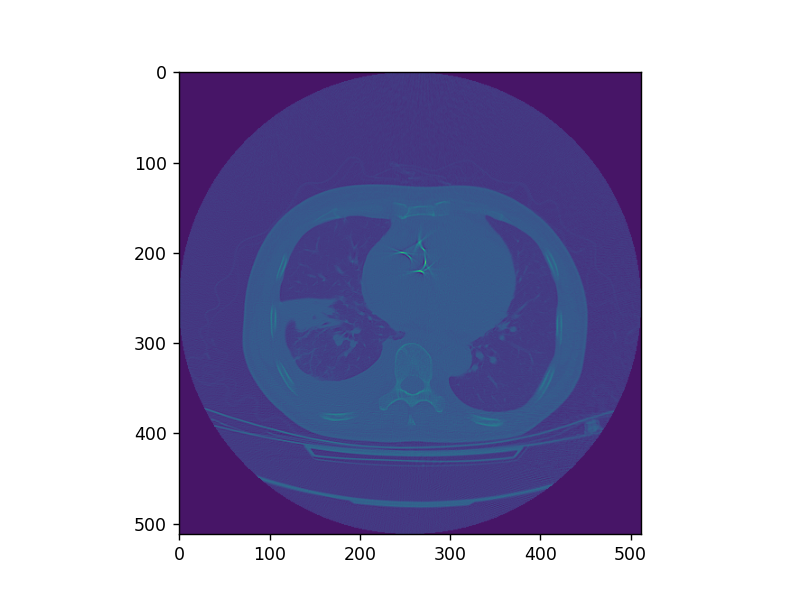

In [5]:
plt.imshow(mat['new_img'][:,:,15])

In [6]:
mat2 = scipy.io.loadmat("sampleData/validation1/20002788_L1/20002788_L1.mat")

In [7]:
def create_animation(data, interval = 150, show = True, filename = None):
    fig = plt.figure( figsize=(8,8) )
    init_frame = data[:,:,0]
    im = plt.imshow(init_frame, interpolation='none', aspect='auto', vmin=0, vmax=1)

    def animate_func(i):
        im.set_array(data[:,:,i])
        return [im]

    frames = data.shape[2]
    
    anim = animation.FuncAnimation(fig, animate_func, frames = frames,interval = interval, blit = True)    
    return anim

<IPython.core.display.Javascript object>


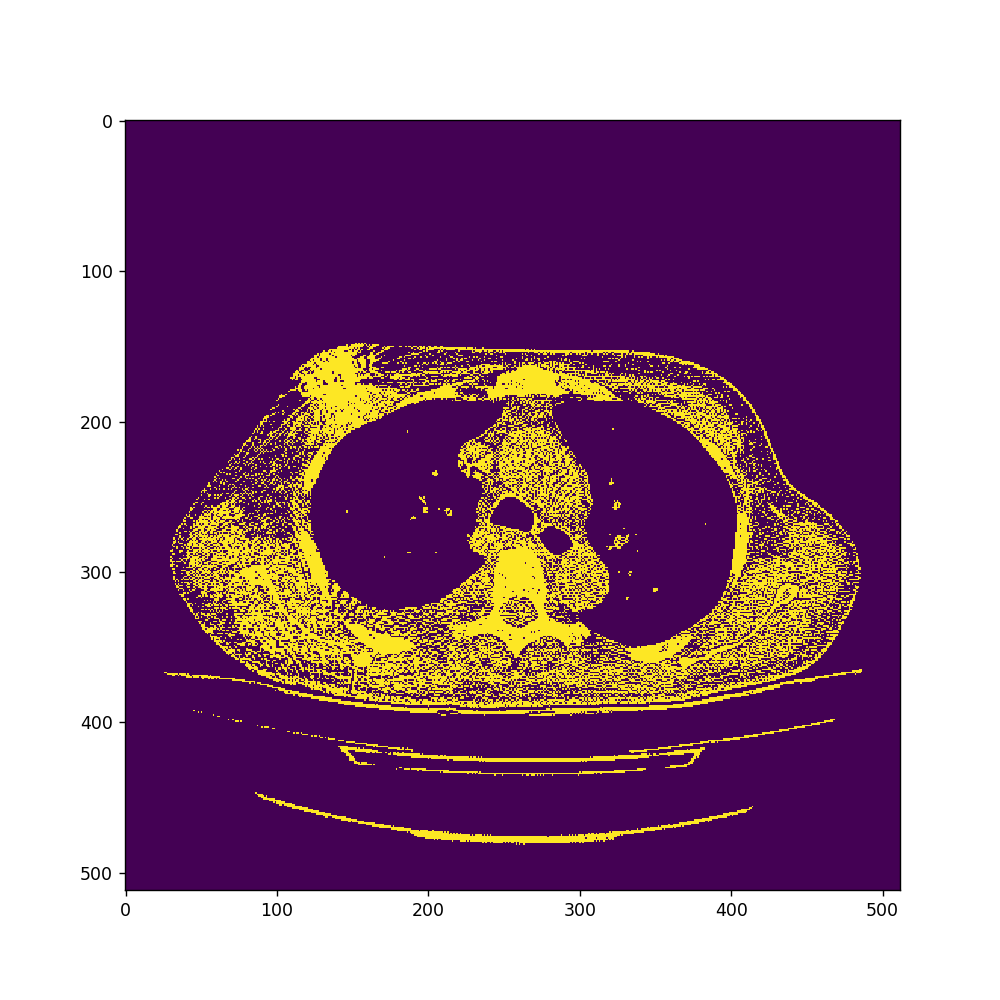

In [8]:
create_animation(mat['new_img'])

<IPython.core.display.Javascript object>


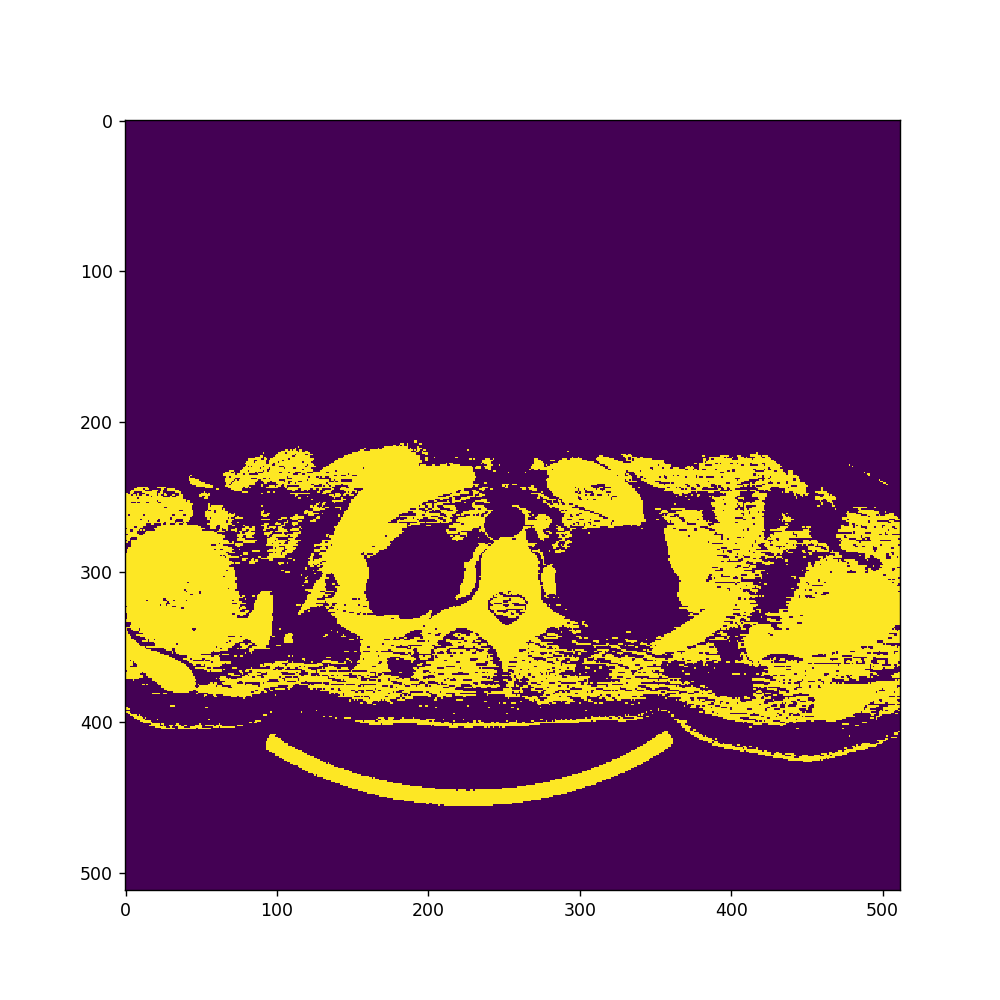

In [9]:
create_animation(mat2['new_img'], interval = 100)

## Dataset description

The only photos we have, are the ones from validation sets. There are CT photos of 12 chests, the size of 512, 512, x; the same photos with lung masks, the size of 256, 256, x; and the most crucial: the photos of zoomed lung masks, the size of 340, 240, 48 each. The "x" means, that this variable was not constant, it was from around 40 to around 500. All photos have .mat extension. The model itself learned from zoomed lung masks, therefore those will be the only ones, we analyse closer. 

In [12]:
files = ['sampleData/validation1.csv', 'sampleData/validation2.csv']

for f in files:
    with open(f) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            img = scipy.io.loadmat(row[0][3:])
            x = np.min(img['only_lung_zoomed_3std'])
            y = np.max(img['only_lung_zoomed_3std'])
            print("shape: ",img['only_lung_zoomed_3std'].shape,"size:", os.stat(row[0][3:]).st_size,"B min:", x,"max:", y)

shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 333.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 237.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 265.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 284.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 228.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 202.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 197.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 290.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 208.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 269.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 210.0
shape:  (240, 360, 48) size: 33177816 B min: -1024.0 max: 175.0


As you see, all photos have identical measurements, sizes and numbers of bits per pixel.
* Measurements: 240 x 360 x 48
* Size: 33 177 816 B
* Number of bits per pixel: log_2(1024 + 1024) = 11
